In [4]:
# %load TS_DL_LSTM with regression timesteps_Hourly.py
#!/usr/bin/env python

# In[ ]:


import pandas as pd
import numpy as np
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pylab as plt
import seaborn as sns
import math
from pandas import read_excel
import random
import mysql.connector as sql
from sqlalchemy import create_engine
random.seed(7)


In [5]:
import MySQLdb
db_connection = sql.connect(host='192.168.0.5', database='ems', user='admin', password='kripya')
df = pd.read_sql('SELECT * FROM demo_data_tbl', con=db_connection)

In [6]:
df.head()

,updatedDT,OutputACPower
0,2016-01-01 06:00:00,54.868934
1,2016-01-01 07:00:00,56.935643
2,2016-01-01 08:00:00,124.663016
3,2016-01-01 09:00:00,112.767827
4,2016-01-01 10:00:00,148.870919


In [7]:
from datetime import datetime, timedelta
now = datetime(2016,1,1,0,0,0)
last = datetime(2016,1,1,6,0,0)

delta = timedelta(seconds=3600)

times = []
while now < last:
    times.append(now.strftime('%Y-%m-%d %H:%M:%S'))
    now += delta

In [8]:
# In[ ]:


data = pd.DataFrame(times)
dat = data.rename(columns={data.columns[0]: 'updatedDT'})

In [9]:
# In[ ]:


df1 = dat.append(df)
df1

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,OutputACPower,updatedDT
0,NaN,2016-01-01 00:00:00
1,NaN,2016-01-01 01:00:00
2,NaN,2016-01-01 02:00:00
3,NaN,2016-01-01 03:00:00
4,NaN,2016-01-01 04:00:00
5,NaN,2016-01-01 05:00:00
0,54.868934,2016-01-01 06:00:00
1,56.935643,2016-01-01 07:00:00
2,124.663016,2016-01-01 08:00:00
3,112.767827,2016-01-01 09:00:00


In [10]:
# In[ ]:


df1['updatedDT'] = pd.to_datetime(df1['updatedDT'])

In [11]:
df2 = df1.set_index('updatedDT')

In [12]:
df2.index

DatetimeIndex(['2016-01-01 00:00:00', '2016-01-01 01:00:00',
               '2016-01-01 02:00:00', '2016-01-01 03:00:00',
               '2016-01-01 04:00:00', '2016-01-01 05:00:00',
               '2016-01-01 06:00:00', '2016-01-01 07:00:00',
               '2016-01-01 08:00:00', '2016-01-01 09:00:00',
               ...
               '2019-07-17 09:00:00', '2019-07-17 10:00:00',
               '2019-07-17 11:00:00', '2019-07-17 12:00:00',
               '2019-07-17 13:00:00', '2019-07-17 14:00:00',
               '2019-07-17 15:00:00', '2019-07-17 16:00:00',
               '2019-07-17 17:00:00', '2019-07-17 18:00:00'],
              dtype='datetime64[ns]', name='updatedDT', length=31051, freq=None)

In [13]:
df3 = df2.loc['2016-01-01':'2019-01-31']

In [14]:
df3 = df3.fillna(0)

In [15]:
df4 = df3.resample('H').mean()

In [18]:
import tensorflow
import keras
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [19]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [20]:
x = df4[['OutputACPower']]
x

,OutputACPower
updatedDT,
2016-01-01 00:00:00,0.000000
2016-01-01 01:00:00,0.000000
2016-01-01 02:00:00,0.000000
2016-01-01 03:00:00,0.000000
2016-01-01 04:00:00,0.000000
2016-01-01 05:00:00,0.000000
2016-01-01 06:00:00,54.868934
2016-01-01 07:00:00,56.935643
2016-01-01 08:00:00,124.663016


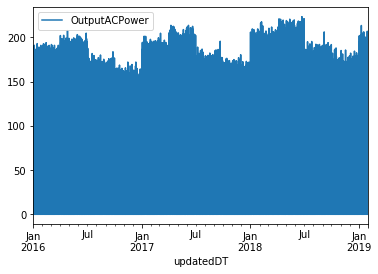

In [21]:
# In[ ]:


x.plot()

In [22]:
# In[ ]:


scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(x)

In [23]:
# In[ ]:
train = dataset[0:26298]
test = dataset[26298:]

In [24]:
#train = dataset.loc['2016-01-01':'2018-12-31']
#test = dataset.loc['2019-01-01':'2019-01-31']

In [25]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [26]:
# In[ ]:


# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [27]:
# In[ ]:


# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=300, batch_size=4, verbose=2)


# In[ ]:

W0808 18:15:45.305907 12716 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0808 18:15:48.003362 12716 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0808 18:15:48.470242 12716 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0808 18:15:49.483354 12716 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0808 18:15:50.111136 12716 deprecation.py:323] From C:\ProgramData\Anaconda3\li

Epoch 1/300
 - 19s - loss: 0.0218
Epoch 2/300
 - 14s - loss: 0.0114
Epoch 3/300
 - 14s - loss: 0.0108
Epoch 4/300
 - 14s - loss: 0.0096
Epoch 5/300
 - 14s - loss: 0.0093
Epoch 6/300
 - 14s - loss: 0.0092
Epoch 7/300
 - 15s - loss: 0.0091
Epoch 8/300
 - 14s - loss: 0.0091
Epoch 9/300
 - 15s - loss: 0.0091
Epoch 10/300
 - 17s - loss: 0.0090
Epoch 11/300
 - 16s - loss: 0.0090
Epoch 12/300
 - 16s - loss: 0.0090
Epoch 13/300
 - 18s - loss: 0.0090
Epoch 14/300
 - 16s - loss: 0.0090
Epoch 15/300
 - 16s - loss: 0.0090
Epoch 16/300
 - 16s - loss: 0.0090
Epoch 17/300
 - 17s - loss: 0.0090
Epoch 18/300
 - 17s - loss: 0.0090
Epoch 19/300
 - 17s - loss: 0.0090
Epoch 20/300
 - 16s - loss: 0.0089
Epoch 21/300
 - 18s - loss: 0.0089
Epoch 22/300
 - 16s - loss: 0.0089
Epoch 23/300
 - 16s - loss: 0.0089
Epoch 24/300
 - 16s - loss: 0.0089
Epoch 25/300
 - 16s - loss: 0.0089
Epoch 26/300
 - 15s - loss: 0.0088
Epoch 27/300
 - 15s - loss: 0.0088
Epoch 28/300
 - 16s - loss: 0.0088
Epoch 29/300
 - 15s - loss: 0

In [28]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [29]:
# In[ ]:


# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [30]:
# In[ ]:


# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

In [31]:
# In[ ]:


# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [32]:
# In[ ]:


# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

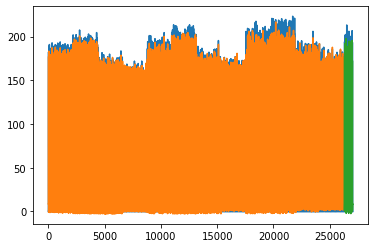

In [33]:
# In[ ]:


# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [34]:
# In[ ]:


# make a one-step forecast
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))
    yhat = model.predict(X, batch_size=batch_size)
    return yhat[0,0]

In [35]:
# In[ ]:


df_test_1 = df4.loc['2019-01-01':'2019-01-31']
df_test_1

,OutputACPower
updatedDT,
2019-01-01 00:00:00,0.000000
2019-01-01 01:00:00,0.000000
2019-01-01 02:00:00,0.000000
2019-01-01 03:00:00,0.000000
2019-01-01 04:00:00,0.000000
2019-01-01 05:00:00,0.000000
2019-01-01 06:00:00,59.929270
2019-01-01 07:00:00,61.210642
2019-01-01 08:00:00,139.860493


In [36]:
# In[ ]:


df_test_1 = df_test_1[['OutputACPower']]
df_test_1

,OutputACPower
updatedDT,
2019-01-01 00:00:00,0.000000
2019-01-01 01:00:00,0.000000
2019-01-01 02:00:00,0.000000
2019-01-01 03:00:00,0.000000
2019-01-01 04:00:00,0.000000
2019-01-01 05:00:00,0.000000
2019-01-01 06:00:00,59.929270
2019-01-01 07:00:00,61.210642
2019-01-01 08:00:00,139.860493


In [37]:
# In[ ]:


scaler = MinMaxScaler(feature_range=(0, 1))
df_test_1 = scaler.fit_transform(df_test_1)

In [38]:
# In[ ]:


look_back = 3
#trainX, trainY = create_dataset(train, look_back)
t_testX, t_testY = create_dataset(df_test_1, look_back)

In [39]:
# In[ ]:


df_testX = np.reshape(t_testX, (t_testX.shape[0], t_testX.shape[1], 1))

In [40]:
# In[ ]:


testPredict_1 = model.predict(df_testX)

In [41]:
# In[ ]:


testPredict_1

array([[ 3.75997722e-02],
       [ 3.75997722e-02],
       [ 3.75997722e-02],
       [ 3.75997722e-02],
       [ 2.87581414e-01],
       [ 5.92647612e-01],
       [ 6.69682622e-01],
       [ 8.09028983e-01],
       [ 7.20434904e-01],
       [ 7.03934073e-01],
       [ 6.56619668e-01],
       [ 8.52885187e-01],
       [ 7.27954328e-01],
       [ 5.48405468e-01],
       [ 2.10236207e-01],
       [ 1.97908223e-01],
       [ 2.14162469e-02],
       [ 1.20823011e-02],
       [ 1.01254359e-02],
       [ 3.75997722e-02],
       [ 3.75997722e-02],
       [ 3.75997722e-02],
       [ 3.75997722e-02],
       [ 3.75997722e-02],
       [ 3.75997722e-02],
       [ 3.75997722e-02],
       [ 3.75997722e-02],
       [ 3.75997722e-02],
       [ 2.90846944e-01],
       [ 6.04792953e-01],
       [ 5.99570155e-01],
       [ 7.53857195e-01],
       [ 7.07765043e-01],
       [ 7.58998394e-01],
       [ 6.87486827e-01],
       [ 9.07180250e-01],
       [ 7.41680622e-01],
       [ 5.67806065e-01],
       [ 2.2

In [42]:
# In[ ]:


testPredict_1 = scaler.inverse_transform(testPredict_1)
testY_1 = scaler.inverse_transform([t_testY])

In [43]:
# In[ ]:


testPredict_1

array([[ 8.02077293e+00],
       [ 8.02077293e+00],
       [ 8.02077293e+00],
       [ 8.02077293e+00],
       [ 6.13467865e+01],
       [ 1.26423424e+02],
       [ 1.42856506e+02],
       [ 1.72581833e+02],
       [ 1.53682968e+02],
       [ 1.50163025e+02],
       [ 1.40069916e+02],
       [ 1.81937225e+02],
       [ 1.55287018e+02],
       [ 1.16985703e+02],
       [ 4.48475266e+01],
       [ 4.22177277e+01],
       [ 4.56850767e+00],
       [ 2.57739305e+00],
       [ 2.15995502e+00],
       [ 8.02077293e+00],
       [ 8.02077293e+00],
       [ 8.02077293e+00],
       [ 8.02077293e+00],
       [ 8.02077293e+00],
       [ 8.02077293e+00],
       [ 8.02077293e+00],
       [ 8.02077293e+00],
       [ 8.02077293e+00],
       [ 6.20433884e+01],
       [ 1.29014267e+02],
       [ 1.27900139e+02],
       [ 1.60812607e+02],
       [ 1.50980240e+02],
       [ 1.61909317e+02],
       [ 1.46654495e+02],
       [ 1.93519440e+02],
       [ 1.58215103e+02],
       [ 1.21124229e+02],
       [ 4.8

In [44]:
# In[ ]:


testY_1

array([[  0.        ,   0.        ,   0.        ,  59.92926975,
         61.21064155, 139.86049297, 128.72554063, 163.78112659,
        166.9394861 , 141.91191668, 187.84527664, 194.15512269,
        118.21966125, 116.9179337 ,  44.58356678,  46.55307743,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,  60.65895809,
         64.51560105, 123.74565602, 115.55388125, 153.18613886,
        183.42342634, 161.41114858, 195.8577559 , 201.690905  ,
        123.78973176, 120.92034882,  44.66234476,  42.8236239 ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,  66.55735811,
         61.84086204, 122.35841514, 129.33320625, 172.5031898 ,
        145.32381353, 169.70943072, 190.63306862, 191.16087413,
        120.56120663, 122.89058985,  50.

In [45]:
# In[ ]:


tp_1 = pd.DataFrame(testPredict_1)
tp_1

,0
0,8.020773
1,8.020773
2,8.020773
3,8.020773
4,61.346786
5,126.423424
6,142.856506
7,172.581833
8,153.682968
9,150.163025


In [46]:
# In[ ]:


tp_2 = pd.DataFrame(testY_1)
tp_2

,0,1,2,3,4,5,6,7,8,9,...,730,731,732,733,734,735,736,737,738,739
0,0.0,0.0,0.0,59.92927,61.210642,139.860493,128.725541,163.781127,166.939486,141.911917,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
# In[ ]:


tp_2 = tp_2.T
tp_2

,0
0,0.000000
1,0.000000
2,0.000000
3,59.929270
4,61.210642
5,139.860493
6,128.725541
7,163.781127
8,166.939486
9,141.911917


In [48]:
# In[ ]:


result = pd.concat([tp_1,tp_2],axis=1)
result.columns = ['actual','predicted']
result

,actual,predicted
0,8.020773,0.000000
1,8.020773,0.000000
2,8.020773,0.000000
3,8.020773,59.929270
4,61.346786,61.210642
5,126.423424,139.860493
6,142.856506,128.725541
7,172.581833,163.781127
8,153.682968,166.939486
9,150.163025,141.911917


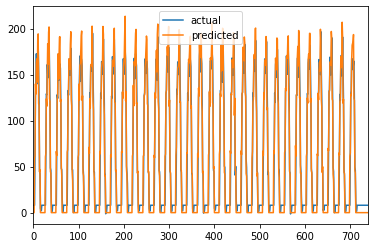

In [49]:
# In[ ]:


result.plot()

In [50]:
# In[ ]:

print('Train Score: %.2f RMSE' % (trainScore))

print('Test Score: %.2f RMSE' % (testScore))

Train Score: 20.19 RMSE
Test Score: 17.86 RMSE
